In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
ad_clicks_csv = pd.read_csv('Social_Network_Ads.csv')
ad_clicks = ad_clicks_csv.drop('User ID',1)
ad_clicks

Gender  Age  EstimatedSalary  Purchased
0      Male   19            19000          0
1      Male   35            20000          0
2    Female   26            43000          0
3    Female   27            57000          0
4      Male   19            76000          0
..      ...  ...              ...        ...
395  Female   46            41000          1
396    Male   51            23000          1
397  Female   50            20000          1
398    Male   36            33000          0
399  Female   49            36000          1

[400 rows x 4 columns]

In [4]:
ad_clicks.describe().T

count        mean           std      min       25%      50%  \
Age              400.0     37.6550     10.482877     18.0     29.75     37.0   
EstimatedSalary  400.0  69742.5000  34096.960282  15000.0  43000.00  70000.0   
Purchased        400.0      0.3575      0.479864      0.0      0.00      0.0   

                     75%       max  
Age                 46.0      60.0  
EstimatedSalary  88000.0  150000.0  
Purchased            1.0       1.0

Categorical Variables

In [5]:
categorical = [var for var in ad_clicks.columns if ad_clicks[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 1 categorical variables

The categorical variables are :

 ['Gender']


In [6]:
for var in categorical: 
    
    print(ad_clicks[var].value_counts())

Female    204
Male      196
Name: Gender, dtype: int64


In [7]:
for var in categorical:
    
     print(ad_clicks[var].value_counts()/np.float(len(ad_clicks)))

Female    0.51
Male      0.49
Name: Gender, dtype: float64


In [8]:
ad_clicks['Purchased'].nunique()

2

In [9]:
ad_clicks['Purchased'].unique()

array([0, 1])

In [10]:
ad_clicks['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

Frequency Distribution of Ad Clicks - Purchased/Unpurchased

/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


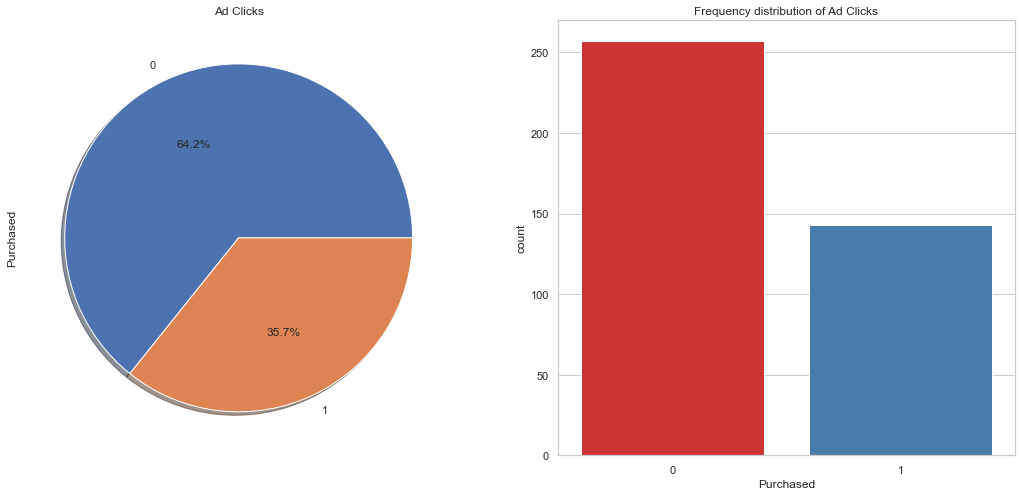

In [48]:
# visualize frequency distribution of income variable

f,ax=plt.subplots(1,2,figsize=(18,8))

ax[0] = ad_clicks['Purchased'].value_counts().plot.pie(explode=[0,0],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Ad Clicks')


#f, ax = plt.subplots(figsize=(6, 8))
ax[1] = sns.countplot(x="Purchased", data=ad_clicks, palette="Set1")
ax[1].set_title("Frequency distribution of Ad Clicks")

plt.show()

Distribution of Ad Clicks by Gender - Purchased/Unpurchased

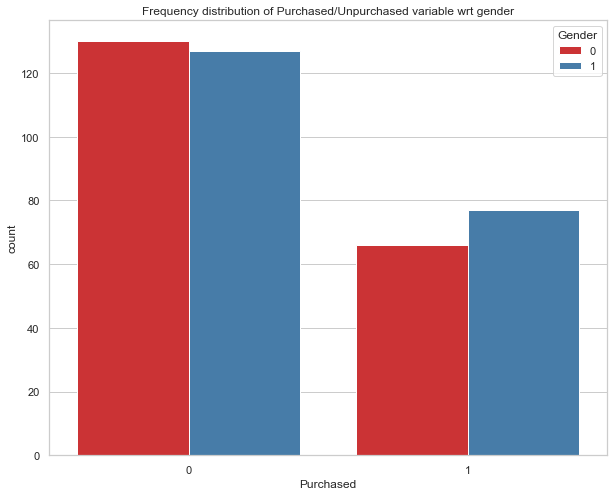

In [49]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.countplot(x="Purchased", hue="Gender", data=ad_clicks, palette="Set1")
ax.set_title("Frequency distribution of Purchased/Unpurchased variable wrt gender")
plt.show()

Numerical Variables

In [13]:
numerical = [var for var in ad_clicks.columns if ad_clicks[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :\n\n', numerical)

There are 3 numerical variables

The numerical variables are :

 ['Age', 'EstimatedSalary', 'Purchased']


In [14]:
ad_clicks[numerical].head()

Age  EstimatedSalary  Purchased
0   19            19000          0
1   35            20000          0
2   26            43000          0
3   27            57000          0
4   19            76000          0

In [15]:
ad_clicks['Age'].nunique()

43

Age Distribution

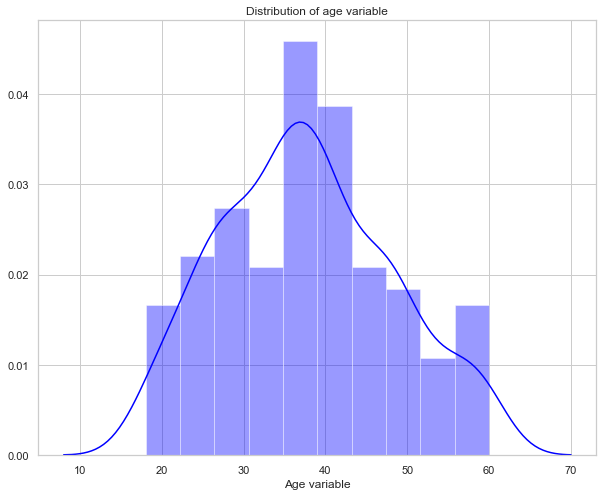

In [18]:
f, ax = plt.subplots(figsize=(10,8))
x = ad_clicks['Age']
x = pd.Series(x, name="Age variable") #informative axis label 
ax = sns.distplot(x, bins=10, color='blue')
sns.set(style='whitegrid')
ax.set_title("Distribution of age variable")
plt.show()

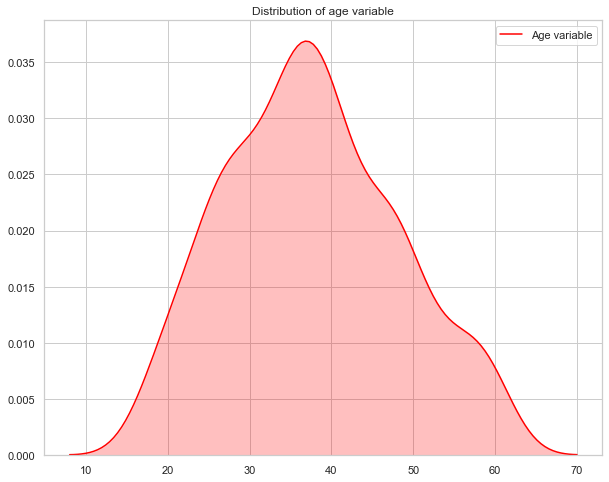

In [17]:
f, ax = plt.subplots(figsize=(10,8))
x = ad_clicks['Age']
x = pd.Series(x, name="Age variable")
ax = sns.kdeplot(x, shade=True, color='red')
ax.set_title("Distribution of age variable")
plt.show()

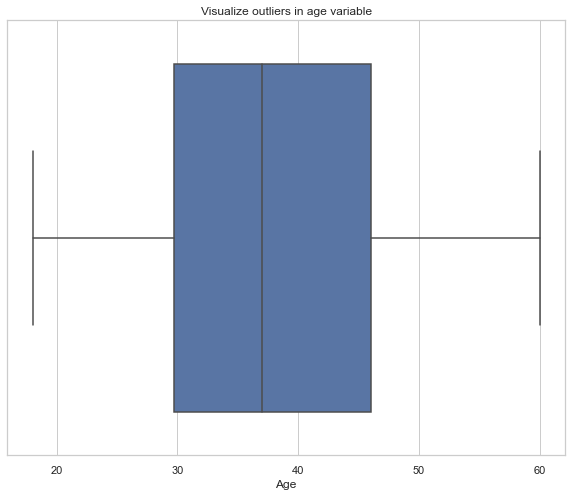

In [19]:
#Detect outliers
f, ax = plt.subplots(figsize=(10,8))
x = ad_clicks['Age']
ax = sns.boxplot(x)
ax.set_title("Visualize outliers in age variable")
plt.show()

Age and Purchased/Unpurchased

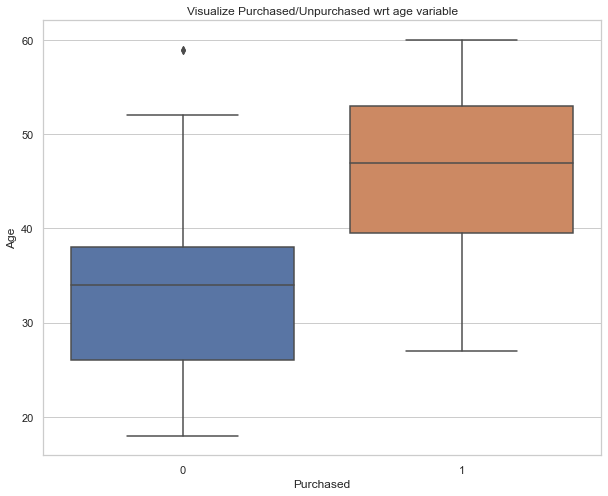

In [20]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x="Purchased", y="Age", data=ad_clicks)
ax.set_title("Visualize Purchased/Unpurchased wrt age variable")
plt.show()

Age and Gender, Purchased/Unpurchased

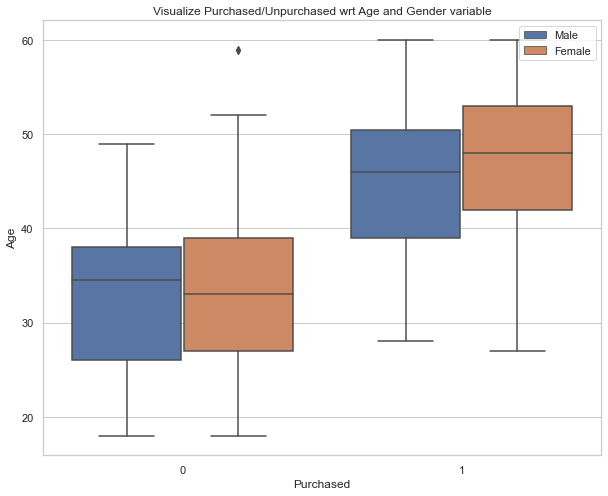

In [21]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x="Purchased", y="Age", hue="Gender", data=ad_clicks)
ax.set_title("Visualize Purchased/Unpurchased wrt Age and Gender variable")
ax.legend(loc='upper right')
plt.show()

Gender-Age Distribution, Purchased/Unpurchased

<Figure size 576x432 with 0 Axes>

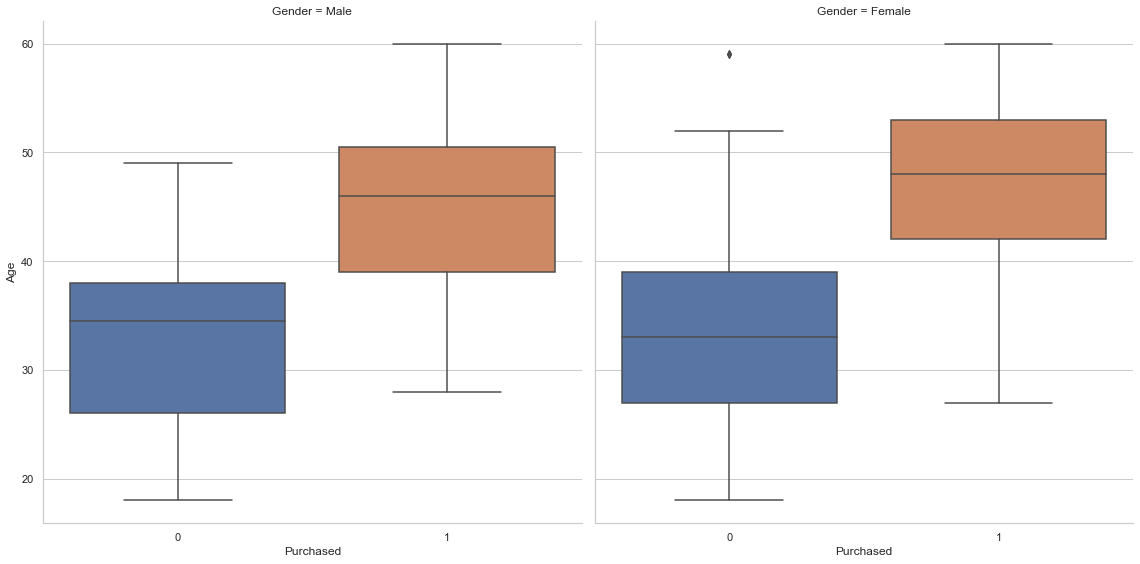

In [22]:
plt.figure(figsize=(8,6))
ax = sns.catplot(x="Purchased", y="Age", col="Gender", data=ad_clicks, kind="box", height=8, aspect=1)
plt.show()

Salary Variable

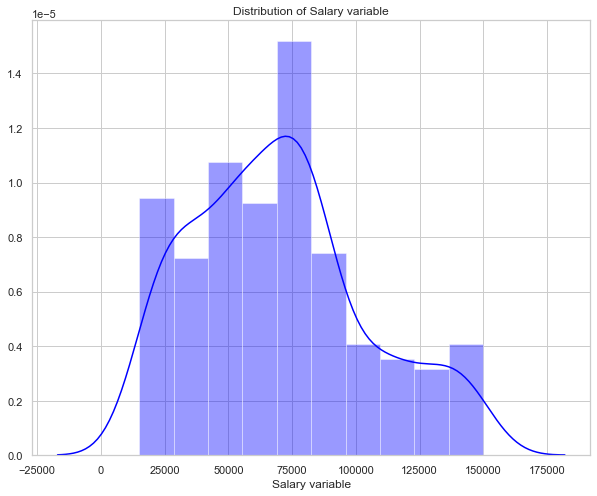

In [23]:
f, ax = plt.subplots(figsize=(10,8))
x = ad_clicks['EstimatedSalary']
x = pd.Series(x, name="Salary variable") #informative axis label 
ax = sns.distplot(x, bins=10, color='blue')
ax.set_title("Distribution of Salary variable")
plt.show()

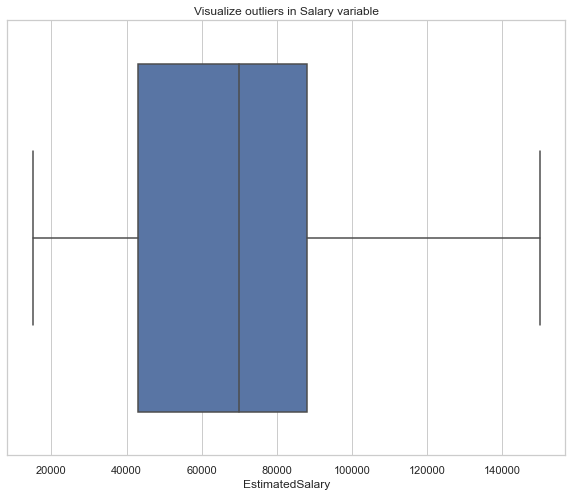

In [24]:
#Detect outliers
f, ax = plt.subplots(figsize=(10,8))
x = ad_clicks['EstimatedSalary']
ax = sns.boxplot(x)
ax.set_title("Visualize outliers in Salary variable")
plt.show()

Salary, Purchased/Unpurchased

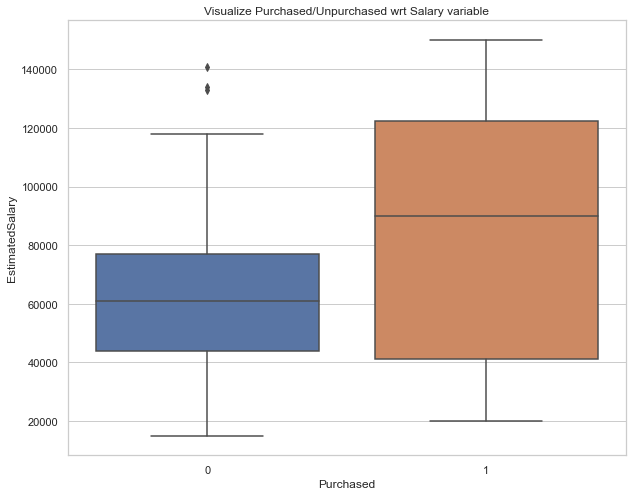

In [25]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x="Purchased", y="EstimatedSalary", data=ad_clicks)
ax.set_title("Visualize Purchased/Unpurchased wrt Salary variable")
plt.show()

Salary and Gender, Purchased/Unpurchased

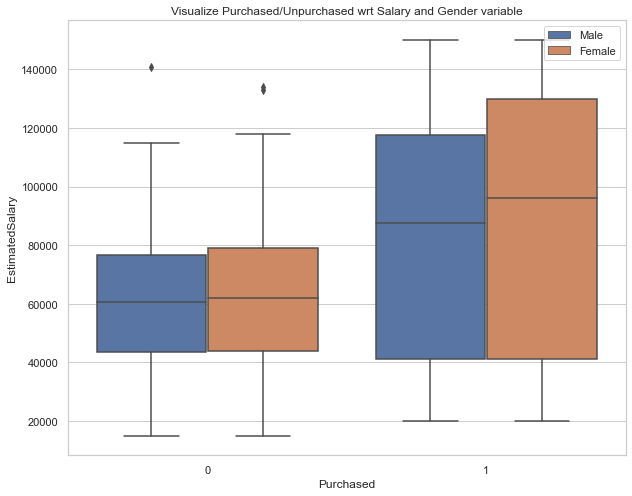

In [26]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.boxplot(x="Purchased", y="EstimatedSalary", hue="Gender", data=ad_clicks)
ax.set_title("Visualize Purchased/Unpurchased wrt Salary and Gender variable")
ax.legend(loc='upper right')
plt.show()

Salary-Gender Distribution, Purchased/Unpurchased

<Figure size 576x432 with 0 Axes>

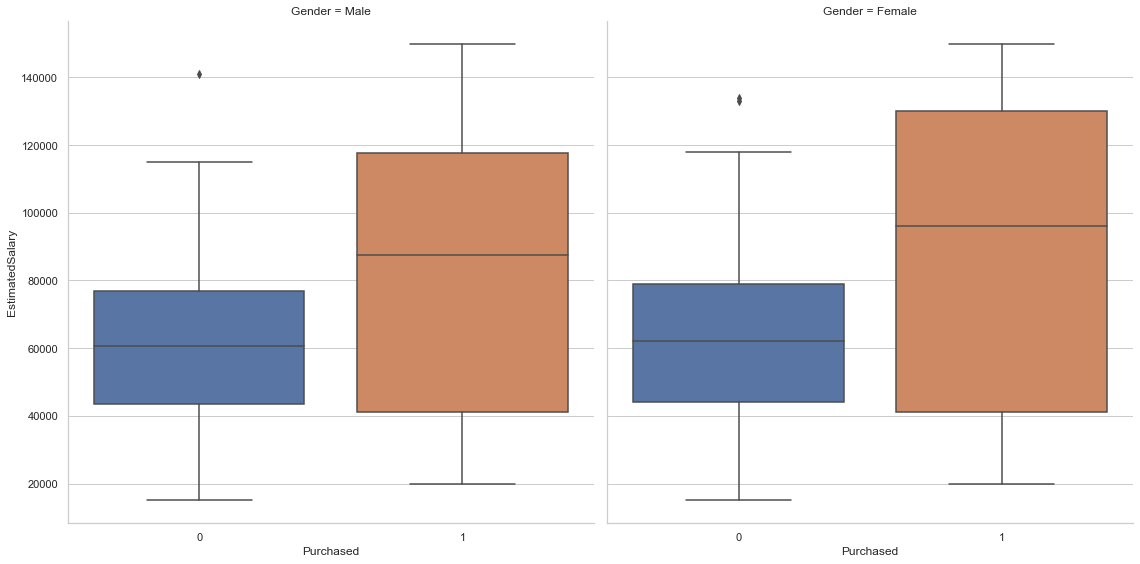

In [27]:
plt.figure(figsize=(8,6))
ax = sns.catplot(x="Purchased", y="EstimatedSalary", col="Gender", data=ad_clicks, kind="box", height=8, aspect=1)
plt.show()

In [28]:
ad_clicks.corr().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

In [29]:
ad_clicks

Gender  Age  EstimatedSalary  Purchased
0      Male   19            19000          0
1      Male   35            20000          0
2    Female   26            43000          0
3    Female   27            57000          0
4      Male   19            76000          0
..      ...  ...              ...        ...
395  Female   46            41000          1
396    Male   51            23000          1
397  Female   50            20000          1
398    Male   36            33000          0
399  Female   49            36000          1

[400 rows x 4 columns]

Target Age Distributions

In [99]:
min_value = ad_clicks['Age'].min()
max_value = ad_clicks['Age'].max()
print(min_value, max_value)
age_bins_ar2 = np.linspace(min_value,max_value,5)
print(age_bins_ar2)

18 60
[18.  28.5 39.  49.5 60. ]


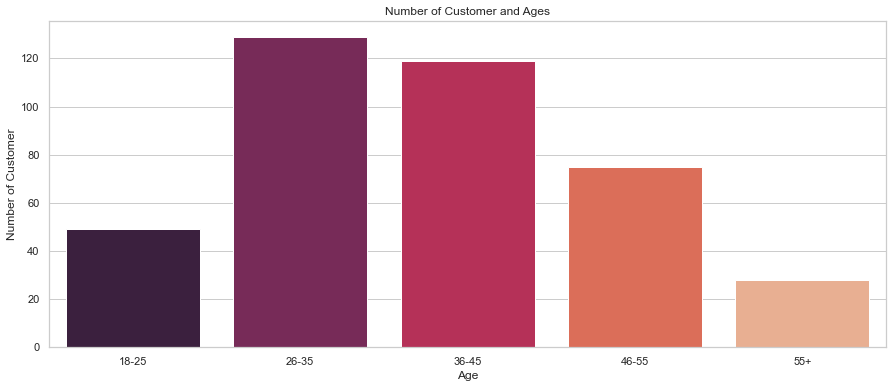

In [63]:
age18_25 = ad_clicks.Age[(ad_clicks.Age <= 25) & (ad_clicks.Age >= 18)]
age26_35 = ad_clicks.Age[(ad_clicks.Age <= 35) & (ad_clicks.Age >= 26)]
age36_45 = ad_clicks.Age[(ad_clicks.Age <= 45) & (ad_clicks.Age >= 36)]
age46_55 = ad_clicks.Age[(ad_clicks.Age <= 55) & (ad_clicks.Age >= 46)]
age55above = ad_clicks.Age[ad_clicks.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

In [ ]:
for gend_age in ad_clicks['Gender']:
    if 

In [77]:
y_sum = sum(y)
y_array = np.asarray(y)
print(y_array)
perc_list = y_array/y_sum
print(perc_list)
perc_val = perc_list*100
print(perc_val)

[ 49 129 119  75  28]
[0.1225 0.3225 0.2975 0.1875 0.07  ]
[12.25 32.25 29.75 18.75  7.  ]


In [96]:
dict = {'Age Group': x, 'Total Count': y_array, 'Percentage of Users': perc_val}
age_df = pd.DataFrame(dict)
age_df.style.format({'Percentage of Users': '{0:.2f}%'.format,})

Ex: representative percentage of purchased if white woman aged 31 with salary of 37k

In [33]:
#predictive percentage of purchased if white woman aged 31 with salary of 37k
gender_selection = ad_clicks.loc[ad_clicks['Gender'] == 'Female']
age_selection = gender_selection.loc[gender_selection['Age'] == 31]
count_selection = age_selection.loc[age_selection['Purchased'] == 0]
sel_count = count_selection['Purchased'].count()
total = ad_clicks['Purchased'].count()
perc = sel_count/total*100
print(f"Predictive purchase percentage of F/31/37K is {perc}%")
#not correct as this only accounts for sample 

Predictive purchase percentage of F/31/37K is 1.25%


Groupby Gender, Purchased

In [34]:
multi = ad_clicks.groupby(['Purchased', 'Gender']).agg({'Age': ['count'], 'EstimatedSalary':['mean'] })
multi_fill = multi.fillna(0)
multi_fill

Age EstimatedSalary
                 count            mean
Purchased Gender                      
0         Female   127    61480.314961
          Male     130    59630.769231
1         Female    77    88714.285714
          Male      66    83424.242424

In [35]:
multi = ad_clicks.groupby(['Gender', 'Purchased']).agg({'Age': ['count'], 'EstimatedSalary':['mean'] })
multi

Age EstimatedSalary
                 count            mean
Gender Purchased                      
Female 0           127    61480.314961
       1            77    88714.285714
Male   0           130    59630.769231
       1            66    83424.242424

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

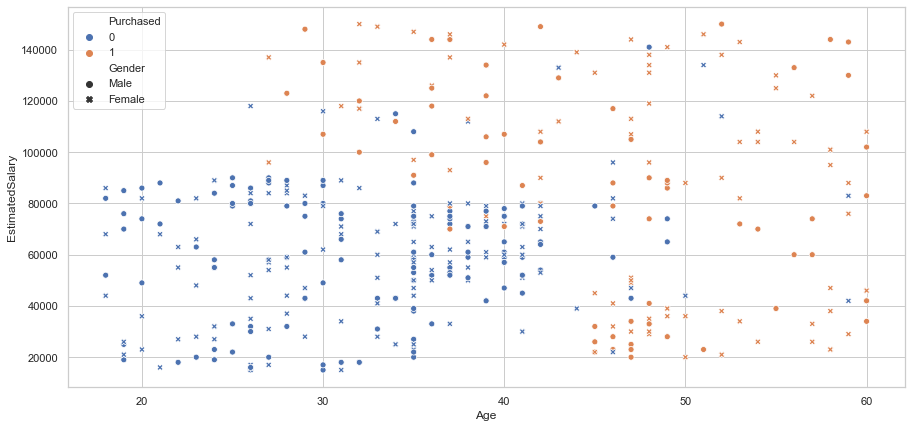

In [36]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=ad_clicks,x='Age',y='EstimatedSalary',hue='Purchased',style='Gender')

Descriptive Analysis

In [37]:
ad_clicks.describe().T

count        mean           std      min       25%      50%  \
Age              400.0     37.6550     10.482877     18.0     29.75     37.0   
EstimatedSalary  400.0  69742.5000  34096.960282  15000.0  43000.00  70000.0   
Purchased        400.0      0.3575      0.479864      0.0      0.00      0.0   

                     75%       max  
Age                 46.0      60.0  
EstimatedSalary  88000.0  150000.0  
Purchased            1.0       1.0

In [38]:
ad_clicks2 = ad_clicks
ad_clicks2['Gender'] = ad_clicks2['Gender'].map({"Male":0, "Female":1})
ad_clicks3 = ad_clicks2.drop('Age Group', 1)
ad_clicks3

Gender  Age  EstimatedSalary  Purchased
0         0   19            19000          0
1         0   35            20000          0
2         1   26            43000          0
3         1   27            57000          0
4         0   19            76000          0
..      ...  ...              ...        ...
395       1   46            41000          1
396       0   51            23000          1
397       1   50            20000          1
398       0   36            33000          0
399       1   49            36000          1

[400 rows x 4 columns]

In [39]:
ad_clicks3.describe()

Gender         Age  EstimatedSalary   Purchased
count  400.000000  400.000000       400.000000  400.000000
mean     0.510000   37.655000     69742.500000    0.357500
std      0.500526   10.482877     34096.960282    0.479864
min      0.000000   18.000000     15000.000000    0.000000
25%      0.000000   29.750000     43000.000000    0.000000
50%      1.000000   37.000000     70000.000000    0.000000
75%      1.000000   46.000000     88000.000000    1.000000
max      1.000000   60.000000    150000.000000    1.000000

Binary Logistic Regression

In [40]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(ad_clicks3, test_size=.2, random_state=42)

In [41]:
import statsmodels.api as sm
from statsmodels.formula.api import logit

formula = ('Purchased ~ Age + EstimatedSalary + Gender')
model = logit(formula=formula, data=train_data).fit()

Optimization terminated successfully.
         Current function value: 0.371365
         Iterations 7


Model Summary

In [42]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Purchased   No. Observations:                  320
Model:                          Logit   Df Residuals:                      316
Method:                           MLE   Df Model:                            3
Date:                Wed, 03 Nov 2021   Pseudo R-squ.:                  0.4313
Time:                        16:51:20   Log-Likelihood:                -118.84
converged:                       True   LL-Null:                       -208.98
Covariance Type:            nonrobust   LLR p-value:                 7.661e-39
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         -11.4195      1.324     -8.624      0.000     -14.015      -8.824
Age                 0.2113      0.027      7.923      0.000       0.159       0.264
EstimatedSalary  3.591e-05   5.76e-06      6.233      0.000    2.46e-05    4.72e-05
Gender             -0.3156      0.328     -0.961      0.337      -0.959       0.328
===================================================================================
"""

The coefficient scores show that Age and Estimated Salary have a significant influence on Purchased/UnPurchased (p-values <0.05).

Marginal Effects Computation 

In [43]:
AME = model.get_margeff(at='overall', method='dydx')
print(AME.summary())

        Logit Marginal Effects       
Dep. Variable:              Purchased
Method:                          dydx
At:                           overall
                     dy/dx    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Age                 0.0252      0.002     14.625      0.000       0.022       0.029
EstimatedSalary  4.285e-06   5.05e-07      8.485      0.000     3.3e-06    5.27e-06
Gender             -0.0377      0.039     -0.965      0.334      -0.114       0.039


Confusion Matrix

In [44]:
import numpy as np 
from sklearn.metrics import classification_report, accuracy_score

prediction = model.predict(exog= test_data)
cutoff =.5
y_prediction = np.where(prediction> cutoff,1,0)
y_actual = test_data['Purchased']

conf_matrix = pd.crosstab(y_actual, y_prediction, rownames= ["Actual"], colnames=['Predicted'], margins=True)

print(conf_matrix)

Predicted   0   1  All
Actual                
0          50   2   52
1           7  21   28
All        57  23   80


Test dataset has 52 Purchased, and 28 Not Purchased, the trained model 
classified 50 Purchased, and 21 Not Purchased accurately.

Classification Accuracy

In [45]:
accuracy = accuracy_score(y_actual, y_prediction)
print('Accuracy: %.2f' % accuracy + "%")

Accuracy: 0.89%


Classification Report

In [46]:
print(classification_report(y_actual, y_prediction))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92        52
           1       0.91      0.75      0.82        28

    accuracy                           0.89        80
   macro avg       0.90      0.86      0.87        80
weighted avg       0.89      0.89      0.88        80

